# make the 12c vs 11/10c correction

In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy
import csv
from matplotlib import pyplot as plt


In [2]:
def cs_iso_corr(filename,thickness):
    df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","iso_corr_factor"])
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    factor_2198 = (1./T_2198)*(pow(10,27))
    factor_1086 = (1./T_1086)*(pow(10,27))
    factor_54 = (1./T_54)*(pow(10,27))
    energy_vals = ["400","550","650","800"]
    list_thick = []
    list_medium = []
    list_thin = []
    #print(df)
    for ene in energy_vals:
        #print(float(df.loc[(df["targettype"] == "c_2198")& (df["energy"] == float(ene))]["geo_corr_factor"]))
        #print(float(df.loc[(df["targettype"] == "empty")& (df["energy"] == float(ene))]["geo_corr_factor"]))
        thick_val = float(df.loc[(df["targettype"] == "c_2198")& (df["energy"] == float(ene))]["iso_corr_factor"])
        medium_val= float(df.loc[(df["targettype"] == "c_1086")& (df["energy"] == float(ene))]["iso_corr_factor"])
        thin_val = float(df.loc[(df["targettype"] == "c_54")& (df["energy"] == float(ene))]["iso_corr_factor"])
        empty_val = float(df.loc[(df["targettype"] == "empty")& (df["energy"] == float(ene))]["iso_corr_factor"])
        corr_thick = -factor_2198*math.log((1-thick_val)/(1-empty_val))
        corr_medium = -factor_1086*math.log((1-medium_val)/(1-empty_val))
        corr_thin = -factor_54*math.log((1-thin_val)/(1-empty_val))
        list_thick.append(corr_thick)
        list_medium.append(corr_medium)
        list_thin.append(corr_thin)
        
    if (thickness == "thick"):
        return list_thick
    if (thickness == "medium"):
        return list_medium
    if (thickness == "thin"):
        return list_thin

In [3]:
f_name = "res_right_side_geo_corr.txt"
iso_corr_thick = cs_iso_corr(f_name,"thick")
iso_corr_medium = cs_iso_corr(f_name,"medium")
iso_corr_thin = cs_iso_corr(f_name,"thin")

### ok this is actually not the right side, but the left side

Text(0.5, 1.0, 'Isotope Correction Factor')

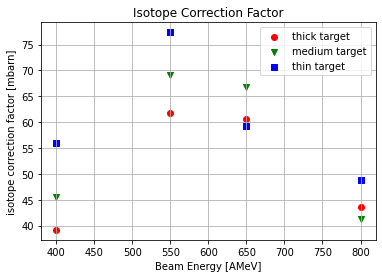

In [4]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,iso_corr_thick,label="thick target",color='red',marker="o")
ax.scatter(energy,iso_corr_medium,label="medium target",color='green',marker="v")
ax.scatter(energy,iso_corr_thin,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor")
#plt.savefig('corig_geo_corr_factor.png')

## with the default values

In [5]:
f_name_def = "default_iso_corr.txt"
def_iso_corr_thick = cs_iso_corr(f_name_def,"thick")
def_iso_corr_medium = cs_iso_corr(f_name_def,"medium")
def_iso_corr_thin = cs_iso_corr(f_name_def,"thin")


Text(0.5, 1.0, 'Isotope Correction Factor')

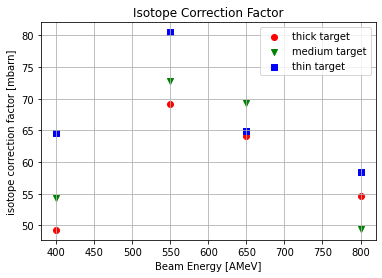

In [6]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,def_iso_corr_thick,label="thick target",color='red',marker="o")
ax.scatter(energy,def_iso_corr_medium,label="medium target",color='green',marker="v")
ax.scatter(energy,def_iso_corr_thin,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor")

## now not using cluster data, but raw data, no cuts on mw12

In [7]:
f_name_raw = "res_right_no_cluster_no_cut_iso_corr.txt"
raw_iso_corr_thick = cs_iso_corr(f_name_raw,"thick")
raw_iso_corr_medium = cs_iso_corr(f_name_raw,"medium")
raw_iso_corr_thin = cs_iso_corr(f_name_raw,"thin")

### ok this is actually not the right side but the left side

Text(0.5, 1.0, 'Isotope Correction Factor TWIN Music')

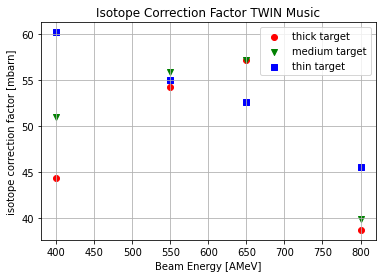

In [8]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,raw_iso_corr_thick,label="thick target",color='red',marker="o")
ax.scatter(energy,raw_iso_corr_medium,label="medium target",color='green',marker="v")
ax.scatter(energy,raw_iso_corr_thin,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")

## now not using cluster data, but raw data, no cuts on mw12, RIGHT SIDE

Text(0.5, 1.0, 'Isotope Correction Factor TWIN Music')

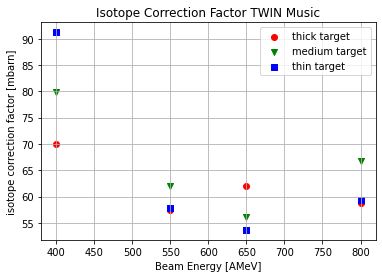

In [9]:
f_name_raw = "res_correct_right_side_no_cuts_no_cluster_iso_corr.txt"
raw_iso_corr_thick = cs_iso_corr(f_name_raw,"thick")
raw_iso_corr_medium = cs_iso_corr(f_name_raw,"medium")
raw_iso_corr_thin = cs_iso_corr(f_name_raw,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,raw_iso_corr_thick,label="thick target",color='red',marker="o")
ax.scatter(energy,raw_iso_corr_medium,label="medium target",color='green',marker="v")
ax.scatter(energy,raw_iso_corr_thin,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")

## now using cluster data, RIGHT SIDE

(43.0, 90.0)

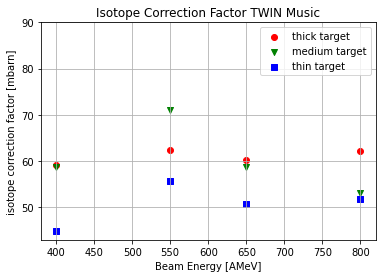

In [10]:
f_name_cluster = "res_correct_right_own_cluster.txt"
cluster_iso_corr_thick = cs_iso_corr(f_name_cluster,"thick")
cluster_iso_corr_medium = cs_iso_corr(f_name_cluster,"medium")
cluster_iso_corr_thin = cs_iso_corr(f_name_cluster,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,cluster_iso_corr_thick,label="thick target",color='red',marker="o")
ax.scatter(energy,cluster_iso_corr_medium,label="medium target",color='green',marker="v")
ax.scatter(energy,cluster_iso_corr_thin,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")
ax.set_ylim(43,90)

## ok before it was with mw1 vs mw3 now it is mw2 vs mw3

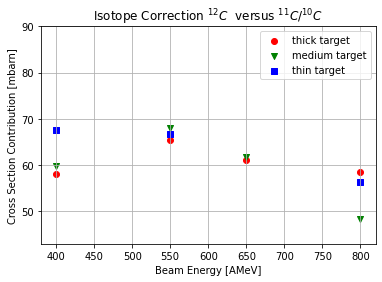

In [11]:
f_name_cluster_mw23 = "res_iso_corr_own_cluster_mw23.txt"
cluster_iso_corr_thick_mw23 = cs_iso_corr(f_name_cluster_mw23,"thick")
cluster_iso_corr_medium_mw23 = cs_iso_corr(f_name_cluster_mw23,"medium")
cluster_iso_corr_thin_mw23 = cs_iso_corr(f_name_cluster_mw23,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,cluster_iso_corr_thick_mw23,label="thick target",color='red',marker="o")
ax.scatter(energy,cluster_iso_corr_medium_mw23,label="medium target",color='green',marker="v")
ax.scatter(energy,cluster_iso_corr_thin_mw23,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
ax.set_ylim(43,90)
plt.savefig('iso_corr_contr_own_cluster_mw23.png')

### no cluster now

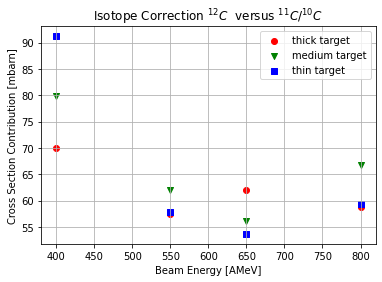

In [12]:
f_name_def_mw23 = "res_mw23_no_cluster_iso_corr.txt"
def_iso_corr_thick_mw23 = cs_iso_corr(f_name_def_mw23,"thick")
def_iso_corr_medium_mw23 = cs_iso_corr(f_name_def_mw23,"medium")
def_iso_corr_thin_mw23 = cs_iso_corr(f_name_def_mw23,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,def_iso_corr_thick_mw23,label="thick target",color='red',marker="o")
ax.scatter(energy,def_iso_corr_medium_mw23,label="medium target",color='green',marker="v")
ax.scatter(energy,def_iso_corr_thin_mw23,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
#ax.set_ylim(43,90)
plt.savefig('iso_corr_contr_default_cluster_mw23.png')

## own cluster mw23 and start from bin right to mean value

(43.0, 90.0)

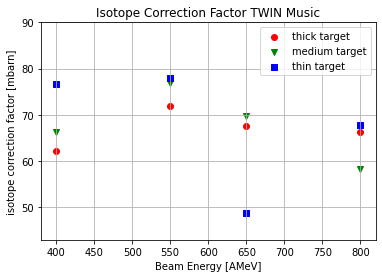

In [13]:
f_name_def_mw23 = "res_mw23_own_clusterplus_bin_iso_corr.txt"
def_iso_corr_thick_mw23 = cs_iso_corr(f_name_def_mw23,"thick")
def_iso_corr_medium_mw23 = cs_iso_corr(f_name_def_mw23,"medium")
def_iso_corr_thin_mw23 = cs_iso_corr(f_name_def_mw23,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,def_iso_corr_thick_mw23,label="thick target",color='red',marker="o")
ax.scatter(energy,def_iso_corr_medium_mw23,label="medium target",color='green',marker="v")
ax.scatter(energy,def_iso_corr_thin_mw23,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")
ax.set_ylim(43,90)

## own cluster mw23 and start from bin left to mean value

(43.0, 90.0)

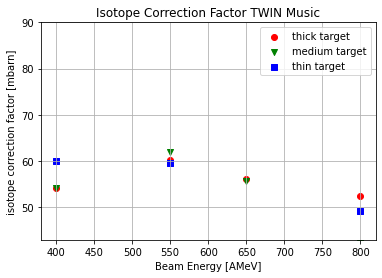

In [14]:
f_name_def_mw23 = "res_mw23_own_clusterminus_bin_iso_corr.txt"
def_iso_corr_thick_mw23 = cs_iso_corr(f_name_def_mw23,"thick")
def_iso_corr_medium_mw23 = cs_iso_corr(f_name_def_mw23,"medium")
def_iso_corr_thin_mw23 = cs_iso_corr(f_name_def_mw23,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,def_iso_corr_thick_mw23,label="thick target",color='red',marker="o")
ax.scatter(energy,def_iso_corr_medium_mw23,label="medium target",color='green',marker="v")
ax.scatter(energy,def_iso_corr_thin_mw23,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("isotope correction factor [mbarn]")
ax.set_title("Isotope Correction Factor TWIN Music")
ax.set_ylim(43,90)

### ok really fancy, just using fourth quadrant to be sure no acceptance issue

### I don't know if this is correct what I do here...

type of...:
<class 'list'>


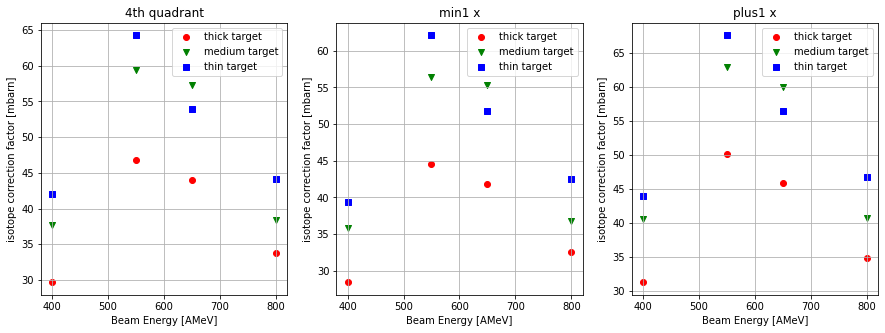

In [15]:
f_name_def_mw23_plus = "prelim_fourth_plus_one_y_iso_corr.txt"
f_name_def_mw23_min = "prelim_fourth_min_one_y_iso_corr.txt"
f_name_def_mw23_def = "prelim_fourth_quadrant_iso_corr.txt"
def_iso_corr_thick_mw23 = cs_iso_corr(f_name_def_mw23_def,"thick")
def_iso_corr_medium_mw23 = cs_iso_corr(f_name_def_mw23_def,"medium")
def_iso_corr_thin_mw23 = cs_iso_corr(f_name_def_mw23_def,"thin")

def_iso_corr_thick_mw23_min = cs_iso_corr(f_name_def_mw23_min,"thick")
def_iso_corr_medium_mw23_min = cs_iso_corr(f_name_def_mw23_min,"medium")
def_iso_corr_thin_mw23_min = cs_iso_corr(f_name_def_mw23_min,"thin")

def_iso_corr_thick_mw23_plus = cs_iso_corr(f_name_def_mw23_plus,"thick")
def_iso_corr_medium_mw23_plus = cs_iso_corr(f_name_def_mw23_plus,"medium")
def_iso_corr_thin_mw23_plus = cs_iso_corr(f_name_def_mw23_plus,"thin")




fig, ax = plt.subplots(1,3,figsize=(15,5))
#fig.tight_layout()
energy = [400,550,650,800]
ax[0].scatter(energy,def_iso_corr_thick_mw23,label="thick target",color='red',marker="o")
ax[0].scatter(energy,def_iso_corr_medium_mw23,label="medium target",color='green',marker="v")
ax[0].scatter(energy,def_iso_corr_thin_mw23,label="thin target",color='blue',marker="s")
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel("Beam Energy [AMeV]")
ax[0].set_ylabel("isotope correction factor [mbarn]")
ax[0].set_title("4th quadrant")

ax[1].scatter(energy,def_iso_corr_thick_mw23_min,label="thick target",color='red',marker="o")
ax[1].scatter(energy,def_iso_corr_medium_mw23_min,label="medium target",color='green',marker="v")
ax[1].scatter(energy,def_iso_corr_thin_mw23_min,label="thin target",color='blue',marker="s")
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel("Beam Energy [AMeV]")
ax[1].set_ylabel("isotope correction factor [mbarn]")
ax[1].set_title("min1 x")

ax[2].scatter(energy,def_iso_corr_thick_mw23_plus,label="thick target",color='red',marker="o")
ax[2].scatter(energy,def_iso_corr_medium_mw23_plus,label="medium target",color='green',marker="v")
ax[2].scatter(energy,def_iso_corr_thin_mw23_plus,label="thin target",color='blue',marker="s")
ax[2].legend()
ax[2].grid()
ax[2].set_xlabel("Beam Energy [AMeV]")
ax[2].set_ylabel("isotope correction factor [mbarn]")
ax[2].set_title("plus1 x")

print("type of...:")
print(type(def_iso_corr_thick_mw23_plus))
#ax.set_ylim(43,90)

## now I have a cut on y 

type of...:
<class 'list'>


Text(0.5, 1.0, 'y down high x')

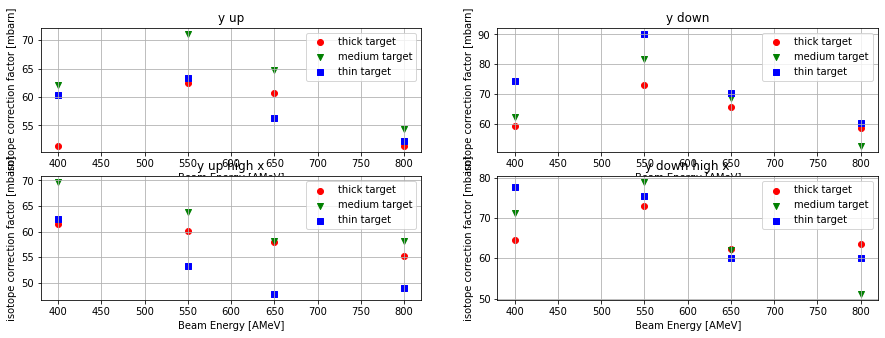

In [16]:
f_y_up = "up_y_comb_iso_corr.txt"

thick_y_up = cs_iso_corr(f_y_up,"thick")
medium_y_up = cs_iso_corr(f_y_up,"medium")
thin_y_up = cs_iso_corr(f_y_up,"thin")

f_y_up_x = "up_y_high_x_com_iso_corr.txt"
thick_y_up_x = cs_iso_corr(f_y_up_x,"thick")
medium_y_up_x = cs_iso_corr(f_y_up_x,"medium")
thin_y_up_x = cs_iso_corr(f_y_up_x,"thin")


f_y_down = "low_y_comb_iso_corr.txt"
thick_y_down = cs_iso_corr(f_y_down,"thick")
medium_y_down = cs_iso_corr(f_y_down,"medium")
thin_y_down = cs_iso_corr(f_y_down,"thin")

f_y_down_x = "low_y_high_x_com_iso_corr.txt"
thick_y_down_x = cs_iso_corr(f_y_down_x,"thick")
medium_y_down_x = cs_iso_corr(f_y_down_x,"medium")
thin_y_down_x = cs_iso_corr(f_y_down_x,"thin")



print("type of...:")
print(type(thin_y_down_x))


fig, ax = plt.subplots(2,2,figsize=(15,5))
#fig.tight_layout()
energy = [400,550,650,800]
ax[0,0].scatter(energy,thick_y_up,label="thick target",color='red',marker="o")
ax[0,0].scatter(energy,medium_y_up,label="medium target",color='green',marker="v")
ax[0,0].scatter(energy,thin_y_up,label="thin target",color='blue',marker="s")
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_xlabel("Beam Energy [AMeV]")
ax[0,0].set_ylabel("isotope correction factor [mbarn]")
ax[0,0].set_title("y up")

ax[1,0].scatter(energy,thick_y_up_x,label="thick target",color='red',marker="o")
ax[1,0].scatter(energy,medium_y_up_x,label="medium target",color='green',marker="v")
ax[1,0].scatter(energy,thin_y_up_x,label="thin target",color='blue',marker="s")
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_xlabel("Beam Energy [AMeV]")
ax[1,0].set_ylabel("isotope correction factor [mbarn]")
ax[1,0].set_title("y up high x")

ax[0,1].scatter(energy,thick_y_down,label="thick target",color='red',marker="o")
ax[0,1].scatter(energy,medium_y_down,label="medium target",color='green',marker="v")
ax[0,1].scatter(energy,thin_y_down,label="thin target",color='blue',marker="s")
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_xlabel("Beam Energy [AMeV]")
ax[0,1].set_ylabel("isotope correction factor [mbarn]")
ax[0,1].set_title("y down")

ax[1,1].scatter(energy,thick_y_down_x,label="thick target",color='red',marker="o")
ax[1,1].scatter(energy,medium_y_down_x,label="medium target",color='green',marker="v")
ax[1,1].scatter(energy,thin_y_down_x,label="thin target",color='blue',marker="s")
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_xlabel("Beam Energy [AMeV]")
ax[1,1].set_ylabel("isotope correction factor [mbarn]")
ax[1,1].set_title("y down high x")

## quadrants

### making the quadrants cuts on mw1

type of...:
<class 'list'>


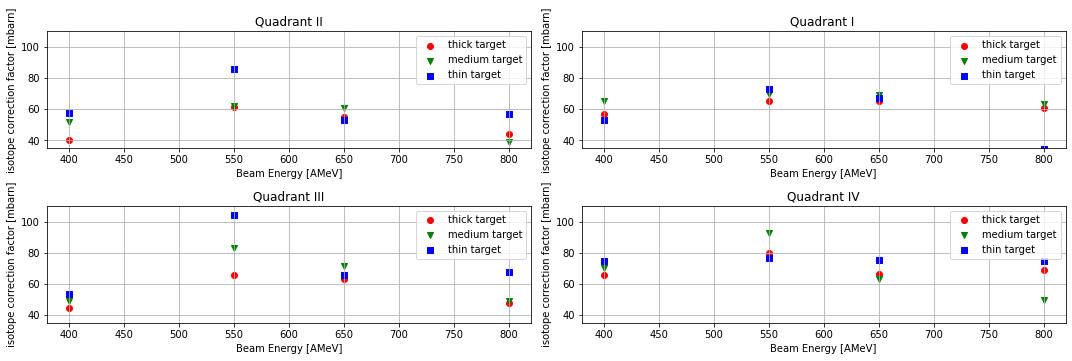

In [17]:
f_quad1 = "quad1_mw1cut.txt"

thick_quad1 = cs_iso_corr(f_quad1,"thick")
medium_quad1 = cs_iso_corr(f_quad1,"medium")
thin_quad1 = cs_iso_corr(f_quad1,"thin")

f_quad2 = "quad2_mw1cut.txt"
thick_quad2 = cs_iso_corr(f_quad2,"thick")
medium_quad2 = cs_iso_corr(f_quad2,"medium")
thin_quad2 = cs_iso_corr(f_quad2,"thin")


f_quad3 = "quad3_mw1cut.txt"
thick_quad3 = cs_iso_corr(f_quad3,"thick")
medium_quad3 = cs_iso_corr(f_quad3,"medium")
thin_quad3 = cs_iso_corr(f_quad3,"thin")

f_quad4 = "quad4_mw1cut.txt"
thick_quad4 = cs_iso_corr(f_quad4,"thick")
medium_quad4 = cs_iso_corr(f_quad4,"medium")
thin_quad4 = cs_iso_corr(f_quad4,"thin")



print("type of...:")
print(type(thin_y_down_x))


fig, ax = plt.subplots(2,2,figsize=(15,5))
fig.tight_layout()
energy = [400,550,650,800]
ax[0,1].scatter(energy,thick_quad1,label="thick target",color='red',marker="o")
ax[0,1].scatter(energy,medium_quad1,label="medium target",color='green',marker="v")
ax[0,1].scatter(energy,thin_quad1,label="thin target",color='blue',marker="s")
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_xlabel("Beam Energy [AMeV]")
ax[0,1].set_ylabel("isotope correction factor [mbarn]")
ax[0,1].set_title("Quadrant I ")

ax[0,0].scatter(energy,thick_quad2,label="thick target",color='red',marker="o")
ax[0,0].scatter(energy,medium_quad2,label="medium target",color='green',marker="v")
ax[0,0].scatter(energy,thin_quad2,label="thin target",color='blue',marker="s")
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_xlabel("Beam Energy [AMeV]")
ax[0,0].set_ylabel("isotope correction factor [mbarn]")
ax[0,0].set_title("Quadrant II")

ax[1,0].scatter(energy,thick_quad3,label="thick target",color='red',marker="o")
ax[1,0].scatter(energy,medium_quad3,label="medium target",color='green',marker="v")
ax[1,0].scatter(energy,thin_quad3,label="thin target",color='blue',marker="s")
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_xlabel("Beam Energy [AMeV]")
ax[1,0].set_ylabel("isotope correction factor [mbarn]")
ax[1,0].set_title("Quadrant III")

ax[1,1].scatter(energy,thick_quad4,label="thick target",color='red',marker="o")
ax[1,1].scatter(energy,medium_quad4,label="medium target",color='green',marker="v")
ax[1,1].scatter(energy,thin_quad4,label="thin target",color='blue',marker="s")
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_xlabel("Beam Energy [AMeV]")
ax[1,1].set_ylabel("isotope correction factor [mbarn]")
ax[1,1].set_title("Quadrant IV")
ax[1,1].set_ylim([35, 110])
ax[1,0].set_ylim([35, 110])
ax[0,1].set_ylim([35, 110])
ax[0,0].set_ylim([35, 110])
fig.tight_layout()

In [18]:
print("these are the results from the fourth quadrant (right down):")
print(thin_quad4)
print(medium_quad4)
print(thick_quad4)

these are the results from the fourth quadrant (right down):
[74.66650499586545, 76.88997354995166, 75.05742757569936, 74.68328237423577]
[70.42305708074346, 92.7238437053239, 63.260308843285785, 49.78598392795706]
[65.88266295978683, 79.73649040791038, 66.64158068654432, 68.91082145086659]


## quadrants with cut on mean on mw2 x and y

type of...:
<class 'list'>


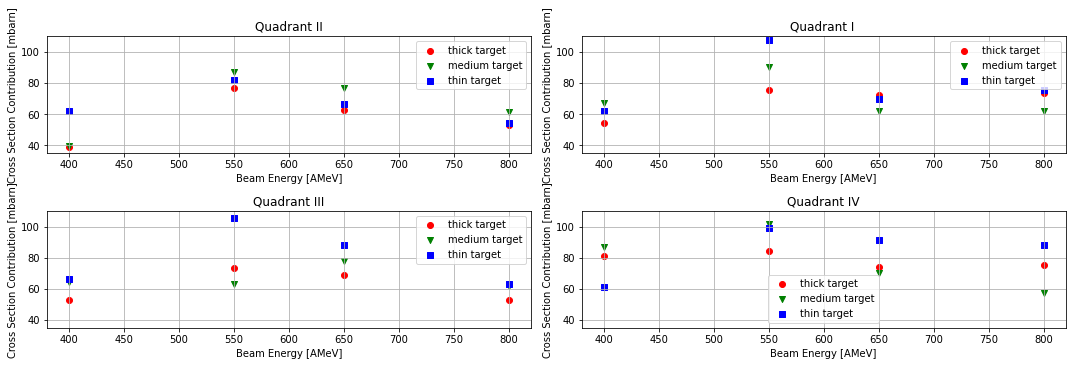

In [19]:
f_quad1 = "quad1_mw2cut.txt"

thick_quad1 = cs_iso_corr(f_quad1,"thick")
medium_quad1 = cs_iso_corr(f_quad1,"medium")
thin_quad1 = cs_iso_corr(f_quad1,"thin")

f_quad2 = "quad2_mw2cut.txt"
thick_quad2 = cs_iso_corr(f_quad2,"thick")
medium_quad2 = cs_iso_corr(f_quad2,"medium")
thin_quad2 = cs_iso_corr(f_quad2,"thin")


f_quad3 = "quad3_mw2cut.txt"
thick_quad3 = cs_iso_corr(f_quad3,"thick")
medium_quad3 = cs_iso_corr(f_quad3,"medium")
thin_quad3 = cs_iso_corr(f_quad3,"thin")

f_quad4 = "quad4_mw2cut.txt"
thick_quad4 = cs_iso_corr(f_quad4,"thick")
medium_quad4 = cs_iso_corr(f_quad4,"medium")
thin_quad4 = cs_iso_corr(f_quad4,"thin")



print("type of...:")
print(type(thin_y_down_x))


fig, ax = plt.subplots(2,2,figsize=(15,5))
fig.tight_layout()
energy = [400,550,650,800]
ax[0,1].scatter(energy,thick_quad1,label="thick target",color='red',marker="o")
ax[0,1].scatter(energy,medium_quad1,label="medium target",color='green',marker="v")
ax[0,1].scatter(energy,thin_quad1,label="thin target",color='blue',marker="s")
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_xlabel("Beam Energy [AMeV]")
ax[0,1].set_ylabel("Cross Section Contribution [mbarn]")
ax[0,1].set_title("Quadrant I ")


ax[0,0].scatter(energy,thick_quad2,label="thick target",color='red',marker="o")
ax[0,0].scatter(energy,medium_quad2,label="medium target",color='green',marker="v")
ax[0,0].scatter(energy,thin_quad2,label="thin target",color='blue',marker="s")
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_xlabel("Beam Energy [AMeV]")
ax[0,0].set_ylabel("Cross Section Contribution [mbarn]")
ax[0,0].set_title("Quadrant II")

ax[1,0].scatter(energy,thick_quad3,label="thick target",color='red',marker="o")
ax[1,0].scatter(energy,medium_quad3,label="medium target",color='green',marker="v")
ax[1,0].scatter(energy,thin_quad3,label="thin target",color='blue',marker="s")
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_xlabel("Beam Energy [AMeV]")
ax[1,0].set_ylabel("Cross Section Contribution [mbarn]")
ax[1,0].set_title("Quadrant III")

ax[1,1].scatter(energy,thick_quad4,label="thick target",color='red',marker="o")
ax[1,1].scatter(energy,medium_quad4,label="medium target",color='green',marker="v")
ax[1,1].scatter(energy,thin_quad4,label="thin target",color='blue',marker="s")
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_xlabel("Beam Energy [AMeV]")
ax[1,1].set_ylabel("Cross Section Contribution [mbarn]")
ax[1,1].set_title("Quadrant IV")
ax[1,1].set_ylim([35, 110])
ax[1,0].set_ylim([35, 110])
ax[0,1].set_ylim([35, 110])
ax[0,0].set_ylim([35, 110])
fig.tight_layout()
plt.savefig('iso_corr_contr_own_cluster_mw23_quadmw1.png')

In [20]:
print("these are the results from the fourth quadrant (right down):")
print(thin_quad4)
print(medium_quad4)
print(thick_quad4)

these are the results from the fourth quadrant (right down):
[61.04054031228705, 99.22859717805035, 91.54070115310117, 88.1171524266292]
[86.72228097196457, 101.47487705146908, 69.89703204952009, 57.556097210978585]
[81.25325339607556, 84.29868131600286, 73.95056833483535, 75.33788379039393]


## to be sure I do MW1 vs MW3 again...

### default clustering

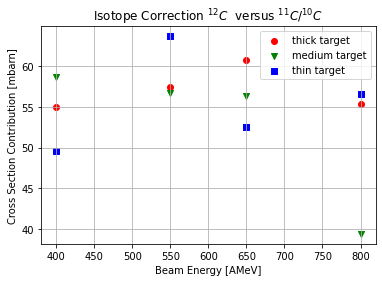

In [21]:
f_name_def_mw13 = "correction_carbon_mw13_default_cluster.txt"
def_iso_corr_thick_mw13 = cs_iso_corr(f_name_def_mw13,"thick")
def_iso_corr_medium_mw13 = cs_iso_corr(f_name_def_mw13,"medium")
def_iso_corr_thin_mw13 = cs_iso_corr(f_name_def_mw13,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,def_iso_corr_thick_mw13,label="thick target",color='red',marker="o")
ax.scatter(energy,def_iso_corr_medium_mw13,label="medium target",color='green',marker="v")
ax.scatter(energy,def_iso_corr_thin_mw13,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
#ax.set_ylim(43,90)
plt.savefig('iso_corr_contr_default_cluster_mw13.png')

### own clustering

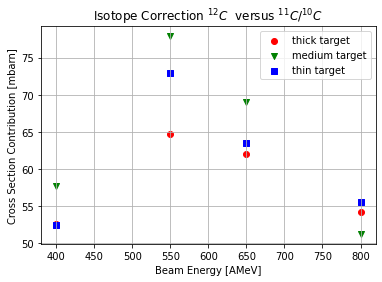

In [22]:
f_name_own_mw13 = "correction_carbon_mw13_own_cluster.txt"
own_iso_corr_thick_mw13 = cs_iso_corr(f_name_own_mw13,"thick")
own_iso_corr_medium_mw13 = cs_iso_corr(f_name_own_mw13,"medium")
own_iso_corr_thin_mw13 = cs_iso_corr(f_name_own_mw13,"thin")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.scatter(energy,own_iso_corr_thick_mw13,label="thick target",color='red',marker="o")
ax.scatter(energy,own_iso_corr_medium_mw13,label="medium target",color='green',marker="v")
ax.scatter(energy,own_iso_corr_thin_mw13,label="thin target",color='blue',marker="s")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
#ax.set_ylim(43,90)
plt.savefig('iso_corr_contr_own_cluster_mw13.png')